<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Proyecto 1. Análisis estadístico: Enfermedades neurodegenerativas </center></font></h1>
<font  face="Courier New" size="3">
<p1><center> Angie Triana - Erika Gómez - Ana Carolina Mejía</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

In [1]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 10.0 MB/s eta 0:00:00


In [2]:
!pip install antropy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.7 MB/s eta 0:00:00
  Created wheel for antropy: filename=antropy-0.1.6-py3-none-any.whl size=16879 sha256=766abe8154e76b858bb1f5637c4e7df635fedf835145faace3cce993b620190c
  Stored in directory: /root/.cache/pip/wheels/98/22/06/e91d7bb213c7133d5e2eb34258623e1e19928d5f05e1ee6812
Successfully built antropy


In [3]:
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import pingouin as pg
import zipfile
from scipy.signal import detrend
import antropy as ant

# **1. Contexto**


1. Consultar para la enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades.


La Esclerosis Lateral Amiotrófica (ELA), la enfermedad de Parkinson (EP) y la Enfermedad de Huntington (EH) son trastornos neurodegenerativos.

La EH, por su parte, es un trastorno hereditario que ocasiona de forma gradual la muerte celular de las neuronas, afectando distintas regiones cerebrales, incluidas aquellas que ayudan a controlar movimientos voluntarios, como los ganglios basales [1]. Ocurre de manera similar en la EP,  donde la consecuente reducción en la producción de dopamina provoca problemas de movimiento [2]. Aunque tanto la EP, como la EH y la ELA se caracterizan por el desarrollo de movimientos involuntarios, rigidez, cambios en la postura y la marcha, la ELA difiere en la neurofisiopatología, puesto que las alteraciones neuronales se dan principalmente en la corteza cerebral, el tronco encefálico y la médula espinal [3].

En general, su diagnóstico es principalmente clínico. Se utiliza una combinación de pruebas y otra información: antecedentes médicos, pruebas neurológicas, pruebas de laboratorio, diagnóstico por imagen y pruebas genéticas [1] [4] [5].  Para la EP,  en casos donde el diagnóstico es incierto, existe una prueba de diagnóstico por imágenes llamada DaTscan, la cual ayuda a visualizar el sistema de dopamina en el cerebro, esta es útil cuando se trata de distinguir la EP de otras afecciones que pueden imitar el Parkinson, siempre y cuando no tengan afecciones relacionadas a la pérdida de nervios de dopamina en el cuerpo estriado.  En la actualidad existen pruebas de LCR y biopsias de la piel [4]. En la ELA también se realizan pruebas musculares para confirmar el diagnóstico: como la EMG, estudios de conducción nerviosa, la RM, análisis de sangre o biopsias musculares.

La precisión del diagnóstico clínico sigue siendo subóptima, y hasta la fecha no existen biomarcadores que permitan un diagnóstico seguro de ninguna de estas fases conceptuales de las enfermedades pre diagnósticas. Por lo tanto, el reto actual para el diagnóstico temprano de estas enfermedades es la identificación y validación de biomarcadores, de manera que se puedan emplear para predecir, diagnosticar o controlar la enfermedad. El desafío radica en encontrar un biomarcador ideal que se pueda analizar fácilmente, varíe con la gravedad de la enfermedad y sea anormal durante la fase preclínica de las enfermedades, antes de que la persona presente los primeros síntomas, para que los médicos puedan evaluar e identificar a las personas con mayor riesgo de desarrollar la EP y monitorear con mayor precisión la progresión de la enfermedad [6] [7]. Esto resulta complejo ya que las características clínicas de la enfermedad se superponen con otras enfermedades neurodegenerativas, y las pruebas diagnósticos o los biomarcadores aún no permiten un diagnóstico definitivo desde las primeras etapas.

2. Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy.

La función detrend de scipy es la encargada de  eliminar tendencia lineal a lo largo del eje de los datos. Donde generalmente los datos de series temporales son una colección de observaciones registradas a lo largo del tiempo, donde normalmente se observa un aumento o disminución de los valores con el tiempo. Ejemplo; la tendencia de aumento de visitas en un sitio web que se vuelve popular. En ocasiones no se usa esta tendencia cuando se quiere analizar otros datos como la estacionalidad o el ruido. En otras ocasiones la tendencia puede ayudar asumiendo que la serie temporal es una combinación aditiva de  la tendencia y otros componentes.

Y(t)=T(t)+S(t)+e(t)

Donde ;

* Y(t):es la serie temporal original
* T(t): es la tendencia
* S(t):es el componente estacional
* e(t):es el ruido

Entonces, para eliminar la tendencia de una serie temporal, necesitamos estimar el componente de tendencia y luego restarlo de los datos originales, dejándonos solo con el componente estacional y el ruido. Esta función se usa para diferentes modelos, uno de estos es  para deshacer la tendencia con un modelo constante (scipy), es una forma sencilla de eliminar está en una serie temporal , donde se resta el valor medio de los datos; es conocido como modelo constante y supone que la tendencia de la serie temporal es una línea recta horizontal. Por otro lado se puede usar para la eliminación de tendencias con  un modelo lineal, es complejo encontrar una serie temporal donde la tendencia sea una simple línea horizontal a través del tiempo, pero sí una tendencia lineal. Además si encuentra que el modelo lineal no es suficiente para eliminar la tendencia, puede probarse un modelo cuadrático. También cuando la tendencia cambia a lo largo del tiempo, puede utilizarse de media móvil para suavizar la tendencia, este modelo célula el valor promedio de los datos durante una ventana determinada y lo resta de cada punto de datos, lo que da como resultado una versión suavizada de la serie temporal [8].


3. Discutir matemáticamente, con fórmulas, cómo funciona el filtro hampel.

El filtro hampel es una técnica utilizada para identificar y  eliminar valores atípicos en un conjunto de datos, empleada en el procesamiento de señales y limpieza de datos para análisis estadísticos. Su funcionamiento se basa en seleccionar un subconjunto o ventana de datos de tamaño “k” con valor predeterminado de 3 a cada lado del punto central, para posteriormente calcular la mediana y la desviación estándar respecto a esta, utilizando la desviación absoluta media (MAD). Un dato se considera atípico si difiere de la mediana en más de cierto número de desviaciones estándar determinado por el parámetro “sigma” (por defecto 3), y es reemplazado por la mediana de la ventana. Este método permite adaptar el valor de “sigma” y “k” con el fin de ajustar qué tan estricto es el filtro al identificar y eliminar valores atípicos, según lo que sea más adecuado para cada tipo de análisis [9]. Matemáticamente, el filtro se implementa mediante los siguiente pasos:

Considerando una función x(t) , se selecciona una ventana de datos de tamaño k (xi, xi+1, xi+2, …, x1+n), para posteriormente calcular la mediana:

    medianak=median(xi−k,xi−k+1,xi−k+2,…,xi,…,xi+k−2,xi+k−1,xi+k)

Luego, se calcula la desviación absoluta mediana (MAD) como medida de dispersión, restando la mediana de la ventana a cada dato y luego obteniendo la mediana de esas desviaciones absolutas:

    MADk​=median(∣xi−k​−medianak​∣,...,∣xi+k​−medianak​∣)

Luego se define el criterio para considerar si un dato es atípico, según un umbral determinado (sigma) que define el  número de desviaciones(n):

    ∣xi​−medianak​∣>n⋅MADk​
Si al restar el valor xi​  y  la mediana de la ventana de datos es mayor que MAD se considera que es un dato atípico y se sustituye por la mediana:

    xi=medianak​​


4. Discutir matemáticamente y desde la bioingeniería qué mide la entropía de permutación. (https://www.aptech.com/blog/permutation-entropy/, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/)

La entropía de permutación es una herramienta robusta de series de tiempo que cuantifica la complejidad de un sistema dinámico mediante la capturación de las relaciones de orden entre los valores de una serie de tiempo y extraer una distribución de probabilidad de los patrones ordinales [10].

El punto de partida del análisis es una serie temporal unidimensional, la cual es dividida en una matriz de vectores de columnas superpuestos. Allí, se establecen dos parámetros esenciales: , que corresponde al retraso de tiempo de incrustación que controla el número de períodos de tiempo entre elementos de cada uno de los nuevos vectores de columna (puede ser cualquier entero positivo) y D, que es la dimensión de incrustación, encargada de controlar la longitud de cada uno de los nuevos vectores de columna.

Posterior a la división de la serie temporal, los vectores D-dimensionales se asignan a permutaciones únicas que capturan las clasificaciones ordinales de los datos, obteniendo los patrones ordinales. Estos se asignan a cada vector dividido en función de la posición ordinal de los valores dentro del vector.

Finalmente, la entropía de permutación del orden D de la serie temporal está dada por:


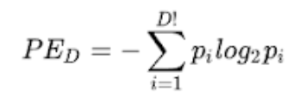

Donde pi es la frecuencia relativa de cada permutación dentro de la serie temporal, y representa la cantidad de información contenida en la comparación de D valores. En su interpretación, un sistema completamente ordenado tiene una EP baja, mientras que un sistema altamente aleatorio tiene una EP más elevada [11].

En bioingeniería, la entropía de permutación es empleada en el proceso de señales biológicas, como de EMG, EEG, ECG, y la señal BOLD, ya que se caracterizan por ser irregulares, no lineales y variables en el tiempo, de forma que los métodos tradicionales de análisis lineal no consiguen caracterizar su comportamiento completamente, por su parte, la entropía de permutación permite capturar de mejor manera la no linealidad de las señales fisiológicas, consiguiendo extraer información de las señales que de otra forma no es posible. Tiene la capacidad de diferenciar estados patológicos, predecir la aparición de un ataque epiléptic o distinguir entre estados del sueño [12].


# **2. Organización de la base de datos**

In [4]:
import os
directorio_actual=os.getcwd()
print(directorio_actual)

/content


***Esclerosis lateral amiotrófica***

In [5]:
ALS= 'ALS.zip'
ruta_destino = 'ALS' #La ruta de destino será la misma carpeta
with zipfile.ZipFile(ALS, 'r') as zip_ref: #Se descomprime el archivo
    zip_ref.extractall(ruta_destino)


In [6]:
ALS=os.listdir(directorio_actual + "/ALS") #Se extraen los archivos de la carpeta Esclerosis lateral amiotrófica.
print("Archivo Esclerosis lateral amiotrófica contiene la información de",len(ALS), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivo Esclerosis lateral amiotrófica contiene la información de 13 sujetos.


***Enfermedad de Huntington***

In [7]:
HUNT= 'HUNT.zip'
ruta_destino = 'HUNT' #La ruta de destino será la misma carpeta
with zipfile.ZipFile(HUNT, 'r') as zip_ref: #Se descomprime el archivo
    zip_ref.extractall(ruta_destino)

In [8]:
HUNT=os.listdir(directorio_actual + "/HUNT") #Se extraen los archivos de la carpeta Enfermedad de Huntington.
print("Archivo Enfermedad de Huntington contiene la información de",len(HUNT), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivo Enfermedad de Huntington contiene la información de 20 sujetos.


***Enfermedad de Parkinson***

In [9]:
PARK= 'PARK.zip'
ruta_destino = 'PARK' #La ruta de destino será la misma carpeta
with zipfile.ZipFile(PARK, 'r') as zip_ref: #Se descomprime el archivo
    zip_ref.extractall(ruta_destino)

In [10]:
PARK=os.listdir(directorio_actual + "/PARK") #Se extraen los archivos de la carpeta Enfermedad de Parkinson.
print("Archivo Enfermedad de Parkinson contiene la información de",len(PARK), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivo Enfermedad de Parkinson contiene la información de 15 sujetos.


***Control sanos***

In [11]:
CONTROL= 'CONTROL.zip'
ruta_destino = 'CONTROL' #La ruta de destino será la misma carpeta
with zipfile.ZipFile(CONTROL, 'r') as zip_ref: #Se descomprime el archivo
    zip_ref.extractall(ruta_destino)

In [12]:
CONTROL=os.listdir(directorio_actual + "/CONTROL") #Se extraen los archivos de la carpeta Control.
print("Archivo Control contiene la información de",len(CONTROL), "sujetos sanos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivo Control contiene la información de 16 sujetos sanos.


---

# **3. Procedimiento**

1. Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés, de cada señal elimine los primeros 20 segundos, y las almacene en un ndarray.

In [13]:
def cargar_y_extraccion(archivo, grupo, directorio, columnas_interes):
    names = ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)',
             'Left Swing Interval (sec)', 'Right Swing Interval (sec)', 'Left Swing Interval (% of stride)',
             'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)',
             'Left Stance Interval (% of stride)', 'Right Stance Interval (% of stride)',
             'Double Support Interval (sec)', 'Double Support Interval (% of stride)']

    datos = pd.read_csv(f"{directorio}/{grupo}/{archivo}", delimiter='\t', names=names)

    datos_interes = datos[columnas_interes]
    datos_array = datos_interes.to_numpy()

    tiempo = datos_array[:,0]
    Left_Stride_Interval=datos_array[:,1]
    Right_Stride_Interval=datos_array[:,2]
    Left_Swing_Interval=datos_array[:,3]
    Right_Swing_Interval=datos_array[:,4]

    return tiempo, Left_Stride_Interval, Right_Stride_Interval, Left_Swing_Interval, Right_Swing_Interval

In [14]:
columnas_interes=['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)', 'Right Swing Interval (sec)']

In [15]:
archivo='als8.ts'
grupo='ALS'

In [16]:
sujeto = cargar_y_extraccion(archivo, grupo , directorio_actual, ['Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 'Left Swing Interval (sec)', 'Right Swing Interval (sec)'])

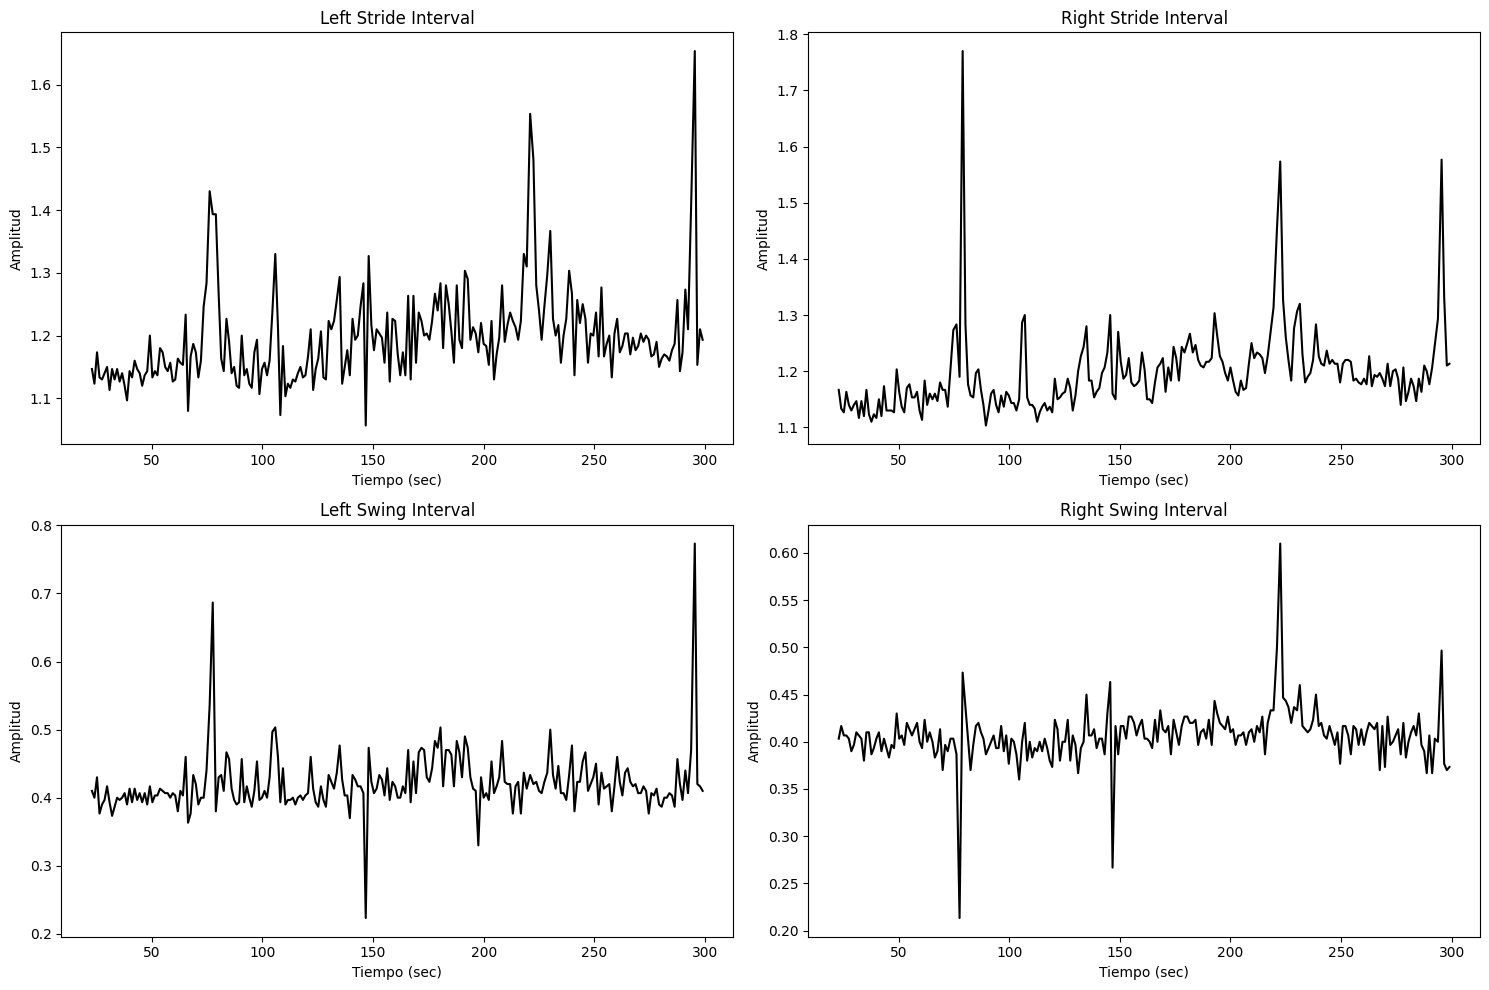

In [17]:
tiempo = sujeto[0]
Left_Stride_Interval = sujeto[1]
Right_Stride_Interval = sujeto[2]
Left_Swing_Interval = sujeto[3]
Right_Swing_Interval = sujeto[4]

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Left Stride Interval')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, Left_Stride_Interval, color='black')

# Gráfica 2: Right Stride Interval detrend
plt.subplot(2, 2, 2)
plt.title('Right Stride Interval')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, Right_Stride_Interval, color='black')

# Gráfica 3: Left Swing Interval detrend
plt.subplot(2, 2, 3)
plt.title('Left Swing Interval')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, Left_Swing_Interval, color='black')

# Gráfica 4: Right Swing Interval detrend
plt.subplot(2, 2, 4)
plt.title('Right Swing Interval')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, Right_Swing_Interval, color='black')

plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

2. Para cada señal eliminar los errores en tendencia usando la rutina detrend.

In [18]:
#Almaceno cada señal con detrend en su variable designada.
#tiempo, Left_Stride_Interval, Right_Stride_Interval, Left_Swing_Interval, Right_Swing_Interval
Left_Stride_Interval_d = detrend(sujeto[1])
Right_Stride_Interval_d = detrend(sujeto[2])
Left_Swing_Interval_d = detrend(sujeto[3])
Right_Swing_Interval_d = detrend(sujeto[4])

3. Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel.

In [19]:
def hampelfilter(wk, K, FilterParms):
    """
    Procedure to implement the Hampel filter
    """
    Thresh = FilterParms[0]
    yk = wk.copy()  # Copiar wk para evitar modificar el original
    n = len(wk)

    for i in range(K, n - K):
        ctr = wk[i - K:i + K + 1]  # Ventana alrededor del punto
        ref = np.median(ctr)

        AbsDev = abs(ctr - ref)
        MAD = 1.4826 * np.median(AbsDev)
        TestVal = abs(wk[i] - ref)

        # Reemplazar el valor si es un outlier
        if TestVal > Thresh * MAD:
            yk[i] = ref

    return yk


In [20]:
# Elimino los valores atípicos de cada señal utilizando el filtro de Hampel a través de la función hampelfilter.

#Almaceno cada señal con filtro Hampel en su variable designada.
L_STR_I_filtered = hampelfilter(Left_Stride_Interval_d, 3, [6])
R_STR_I_filtered = hampelfilter(Right_Stride_Interval_d, 3, [6])
L_SWG_I_filtered = hampelfilter(Left_Swing_Interval_d, 3, [6])
R_SWG_I_filtered = hampelfilter(Right_Swing_Interval_d, 3, [6])

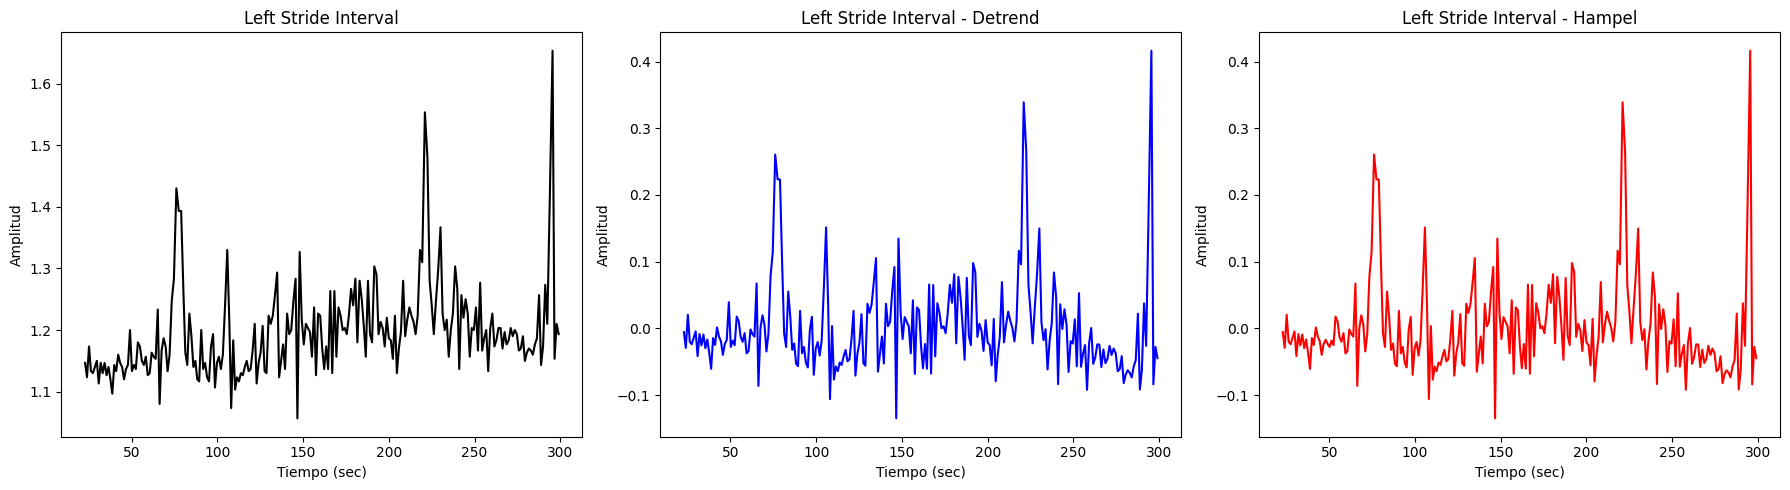

In [21]:
#Observemos las comparaciones
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.title('Left Stride Interval')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, Left_Stride_Interval, color='black')

plt.subplot(1, 3, 2)
plt.title('Left Stride Interval - Detrend')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, Left_Stride_Interval_d, color='blue')

plt.subplot(1, 3, 3)
plt.title('Left Stride Interval - Hampel')
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.plot(tiempo, L_STR_I_filtered, color='red')


plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.tight_layout()

4. Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia .

In [22]:
def calcular_cv_sd(signal):
    sd = np.std(signal, ddof=1)  # Desviación estándar muestral
    mean = np.mean(signal)  # Media de la señal

    # Manejar el caso de la media igual a cero
    if mean != 0:
        cv = (sd / (mean)) * 100  # Coeficiente de variación (%)
    else:
        cv = np.nan  # Si la media es 0, retorna NaN para evitar división por cero

    return cv, sd

In [23]:
cv, sd = calcular_cv_sd(L_STR_I_filtered )
print(f"Desviación Estándar (SD): {sd}")
print(f"Coeficiente de Variación (CV): {cv}%")

Desviación Estándar (SD): 0.06899319057317682
Coeficiente de Variación (CV): -25586.751191709598%


5. Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación.

In [24]:
def entropia_permutacion(signal, dim, tau):
    perm_entropy = ant.perm_entropy(signal, dim, tau, normalize=False)
    return perm_entropy

In [25]:
entropia_permutacion(L_STR_I_filtered ,3,1)

2.577304626131695

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [26]:
grupos=['PARK', 'ALS','HUNT', 'CONTROL']

In [27]:
# Se crea una lista vacía para almacenar los datos que se utilizarán para el DataFrame
Resultados = []

for grupo in grupos:
    archivos = os.listdir(f"{directorio_actual}/{grupo}")

    for archivo in archivos:
        # Cargar las señales originales
        tiempo, Left_Stride, Right_Stride, Left_Swing, Right_Swing = cargar_y_extraccion(archivo, grupo, directorio_actual, columnas_interes)

        # Detrend de las señales
        Left_Stride_Interval_d = detrend(Left_Stride)
        Right_Stride_Interval_d = detrend(Right_Stride)
        Left_Swing_Interval_d = detrend(Left_Swing)
        Right_Swing_Interval_d = detrend(Right_Swing)

        # Aplicar filtro Hampel
        L_STR_I_filtered = hampelfilter(Left_Stride_Interval_d, 3, [6])
        R_STR_I_filtered = hampelfilter(Right_Stride_Interval_d, 3, [6])
        L_SWG_I_filtered = hampelfilter(Left_Swing_Interval_d, 3, [6])
        R_SWG_I_filtered = hampelfilter(Right_Swing_Interval_d, 3, [6])

        # Se define una función para calcular la SD, el CV y la entropía por permutación
        def calcular_caracteristicas(signal):
            cv = calcular_cv_sd(signal)[0]
            sd = calcular_cv_sd(signal)[1]
            entropia = entropia_permutacion(signal,3,1)
            return cv, sd, entropia

        # Se emplea la función para extraer las características de cada señal
        cv_L_STR, sd_L_STR, entropia_L_STR = calcular_caracteristicas(Left_Stride)
        cv_R_STR, sd_R_STR, entropia_R_STR = calcular_caracteristicas(Right_Stride)
        cv_L_SWG, sd_L_SWG, entropia_L_SWG = calcular_caracteristicas(Left_Swing)
        cv_R_SWG, sd_R_SWG, entropia_R_SWG = calcular_caracteristicas(Right_Swing)

        # Se agregan los datos a la lista de resultados creada para hacer la conversión a DataFrame
        Resultados.append({
            'Sujeto': archivo,
            'Condición': grupo,
            'CV_Left_Stride': cv_L_STR,
            'SD_Left_Stride': sd_L_STR,
            'Entropía_Left_Stride': entropia_L_STR,
            'CV_Right_Stride': cv_R_STR,
            'SD_Right_Stride': sd_R_STR,
            'Entropía_Right_Stride': entropia_R_STR,
            'CV_Left_Swing': cv_L_SWG,
            'SD_Left_Swing': sd_L_SWG,
            'Entropía_Left_Swing': entropia_L_SWG,
            'CV_Right_Swing': cv_R_SWG,
            'SD_Right_Swing': sd_R_SWG,
            'Entropía_Right_Swing': entropia_R_SWG
        })

In [28]:
df_datos = pd.DataFrame(Resultados)
print(df_datos)

          Sujeto Condición  CV_Left_Stride  SD_Left_Stride  \
0      park11.ts      PARK      142.976777        1.729624   
1       park5.ts      PARK        4.765606        0.050411   
2      park15.ts      PARK        4.464035        0.052354   
3      park13.ts      PARK        9.987204        0.110449   
4       park4.ts      PARK        6.383168        0.079825   
..           ...       ...             ...             ...   
59  control12.ts   CONTROL        6.498900        0.074304   
60  control15.ts   CONTROL        4.995053        0.069935   
61   control9.ts   CONTROL        3.685176        0.037307   
62   control6.ts   CONTROL        2.906981        0.029932   
63  control10.ts   CONTROL        4.184878        0.041952   

    Entropía_Left_Stride  CV_Right_Stride  SD_Right_Stride  \
0               2.564375       123.233996         1.415083   
1               2.576770         4.938382         0.052243   
2               2.572808         3.882676         0.045543   
3      

# **4. Resultados**

**4.1 Diagrama de cajas y bigotes**

Text(0, 0.5, 'Amplitud')

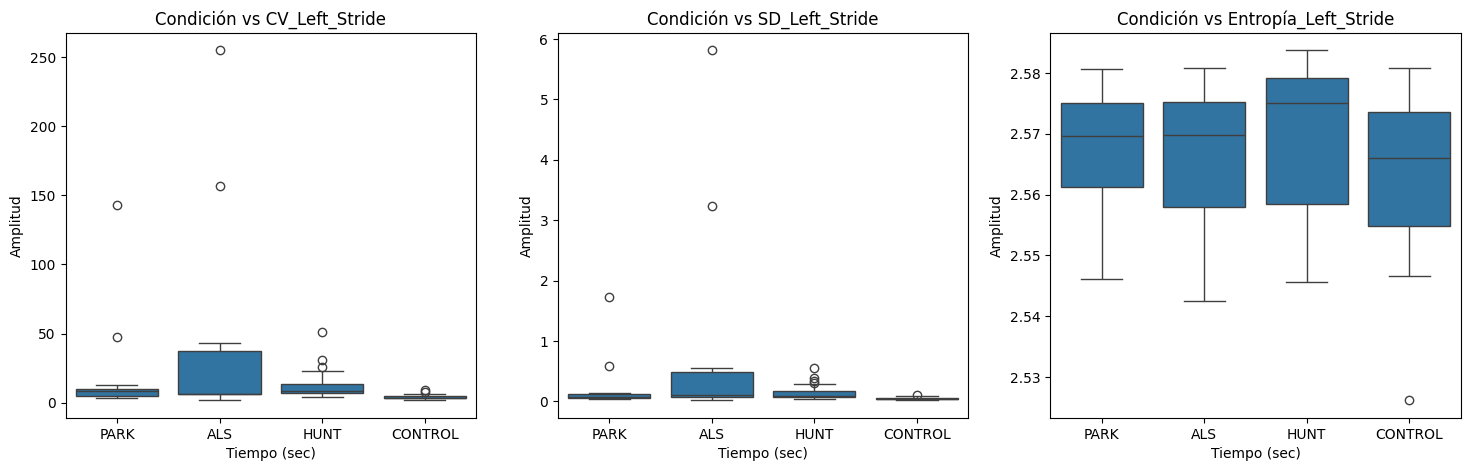

In [29]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.boxplot(x='Condición', y='CV_Left_Stride', data=df_datos)
plt.title("Condición vs CV_Left_Stride")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

plt.subplot(1,3,2)
sns.boxplot(x='Condición', y='SD_Left_Stride', data=df_datos)
plt.title("Condición vs SD_Left_Stride")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

plt.subplot(1,3,3)
sns.boxplot(x='Condición', y='Entropía_Left_Stride', data=df_datos)
plt.title("Condición vs Entropía_Left_Stride")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

(1.95, 2.7)

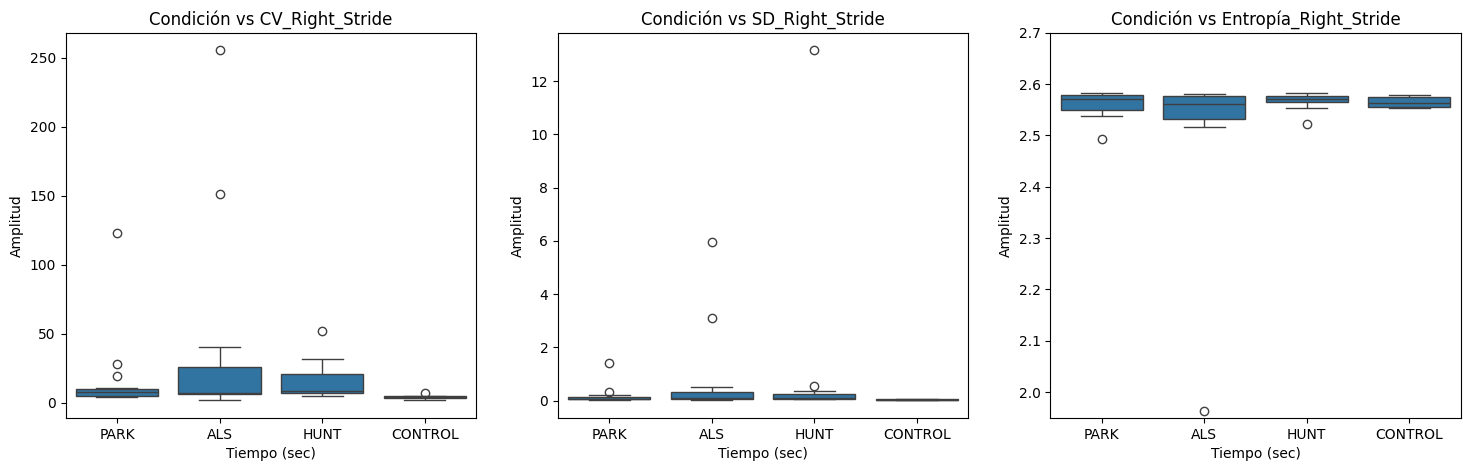

In [30]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.boxplot(x='Condición', y='CV_Right_Stride', data=df_datos)
plt.title("Condición vs CV_Right_Stride")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

plt.subplot(1,3,2)
sns.boxplot(x='Condición', y='SD_Right_Stride', data=df_datos)
plt.title("Condición vs SD_Right_Stride")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

plt.subplot(1,3,3)
sns.boxplot(x='Condición', y='Entropía_Right_Stride', data=df_datos)
plt.title("Condición vs Entropía_Right_Stride")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')
plt.ylim(1.95,2.7)

Text(0, 0.5, 'Amplitud')

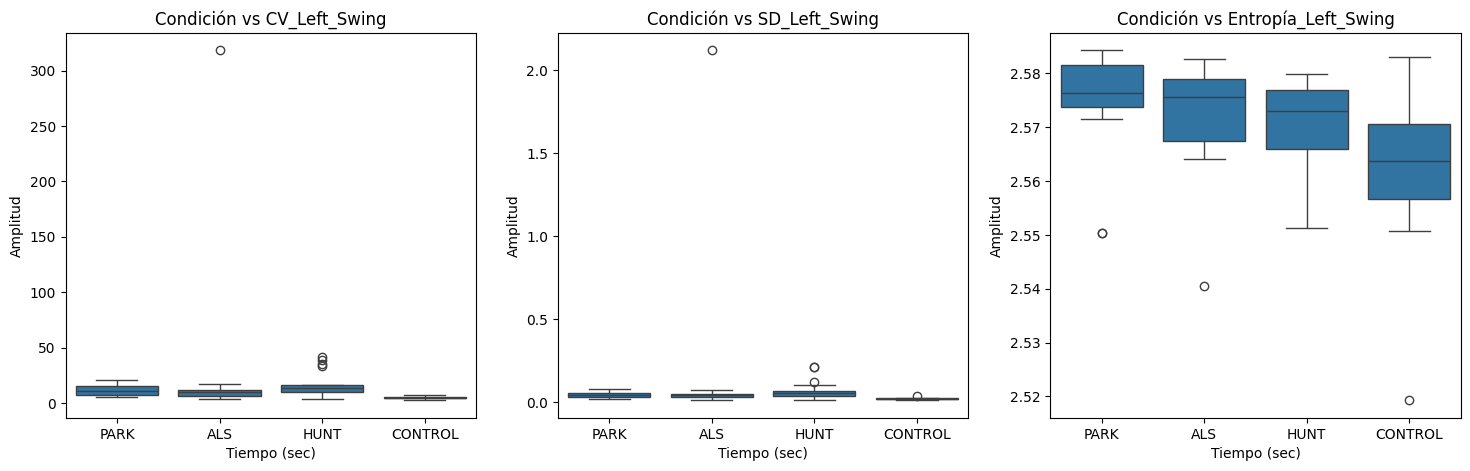

In [31]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.boxplot(x='Condición', y='CV_Left_Swing', data=df_datos)
plt.title("Condición vs CV_Left_Swing")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

plt.subplot(1,3,2)
sns.boxplot(x='Condición', y='SD_Left_Swing', data=df_datos)
plt.title("Condición vs SD_Left_Swing")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

plt.subplot(1,3,3)
sns.boxplot(x='Condición', y='Entropía_Left_Swing', data=df_datos)
plt.title("Condición vs Entropía_Left_Swing")
plt.xlabel('Tiempo (sec)')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Entropía Right_Swing')

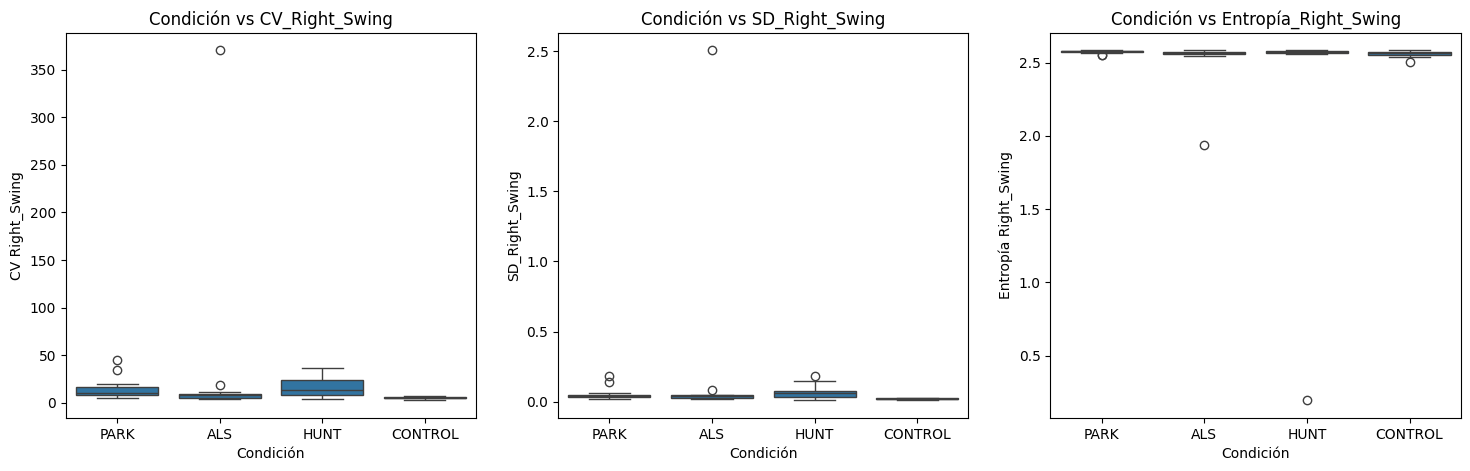

In [32]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.boxplot(x='Condición', y='CV_Right_Swing', data=df_datos)
plt.title("Condición vs CV_Right_Swing")
plt.xlabel('Condición')
plt.ylabel('CV Right_Swing')

plt.subplot(1,3,2)
sns.boxplot(x='Condición', y='SD_Right_Swing', data=df_datos)
plt.title("Condición vs SD_Right_Swing")
plt.xlabel('Condición')
plt.ylabel('SD_Right_Swing')

plt.subplot(1,3,3)
sns.boxplot(x='Condición', y='Entropía_Right_Swing', data=df_datos)
plt.title("Condición vs Entropía_Right_Swing")
plt.xlabel('Condición')
plt.ylabel('Entropía Right_Swing')

---

En general, la diferencia más notable entre grupos es que, para las métricas de la magnitud de la fluctuación entre zancadas y balanceo, es decir, el coeficiente de variación y la desviación estandar (CV y SD, respectivamente), se puede observar cómo los grupos control presentan tendencia hacia una menor variabilidad en comparación con los grupos con la enfermedad de Parkinson, ALS, Huntington y Control. Esto nos indica que los sujetos con la enfermedad tienen una marcha menos constante y más desorganizada temporalmente en comparación a controles sanos, lo cual es esperable, puesto que se ha reportado como en la ALS, la EP y la EH se ve afectada la capacidad de mantener una marcha constante con pequeñas fluctuaciones entre zancadas. En cuanto a la entropía, se observa que se tiene una variabilidad similar entre los grupos, por lo que no se logra captar una diferenciación entre grupos para la complejidad de las señales temporales de marcha.

En su mayoría no se observan grandes diferencias visuales entre las zancadas (derecha e izquierda) y los balanceos, para los diferentes grupos, lo que podría indicar que para realizar la comparación, podrían ser equivalentes las señales temporales. Igualmente, es posible observar algunos datos atípicos, que podrían indicar errores en la adquisición de las señales o en el filtrado de la información.

Para los sujetos con ALS, es posible ver cómo la variabilidad en la marcha tiene un valor menor, en comparación con Huntington y Parkinson. Estas diferencias en la variabilidad podrían ser reflejo de la diferencias neurofisiopatológicas entre enfermedades.

**4.4 Planteamiento de las hipótesis nulas y alternativas**

***Prueba de normalidad Shapiro-Wilks***

Para evaluar la normalidad se seleccionó la prueba de Shapiro-Wilks.

El test de Shapiro-Wilks plantea la hipótesis nula de que una muestra proviene de una distribución normal. En este caso, se eligió un nivel de significancia de 0,05, es decir, se acepta un 5% de probabilidad de cometer un error tipo I (rechazar la hipótesis nula cuando esta es verdadera). Si el valor-p es menor o igual al nivel de significancia, entonces se tiene evidencia suficiente para rechazar la hipótesis nula. De lo contrario, se asume que la hipótesis nula es verdadera.

La hipótesis alternativa es que no se sigue una distribución normal.

Hipótesis nula (H0): La señal tiene una distribución es normal.

Hipótesis alternativa (H1): La señal tiene una distribución no es normal.

In [33]:

def prueba_shapiro(df):
  normalidad = {}
  for canal in df.columns[2:14]:
    stat, p_value = stats.shapiro(df[canal])
    normalidad[canal] = p_value
    print(f"Prueba de Shapiro-Wilk para {canal} - p-value: {p_value}")
    if p_value > 0.05:
        print(f"{grupo}: La señal parece seguir una distribución normal (no se rechaza H0).\n")
    else:
        print(f"{grupo}: La señal no sigue una distribución normal (se rechaza H0).\n")
  return normalidad


In [34]:
shapiro_control=prueba_shapiro(df_datos)

Prueba de Shapiro-Wilk para CV_Left_Stride - p-value: 7.746462940930221e-15
CONTROL: La señal no sigue una distribución normal (se rechaza H0).

Prueba de Shapiro-Wilk para SD_Left_Stride - p-value: 7.616432410167118e-16
CONTROL: La señal no sigue una distribución normal (se rechaza H0).

Prueba de Shapiro-Wilk para Entropía_Left_Stride - p-value: 0.0011623993338224256
CONTROL: La señal no sigue una distribución normal (se rechaza H0).

Prueba de Shapiro-Wilk para CV_Right_Stride - p-value: 5.554628024928422e-15
CONTROL: La señal no sigue una distribución normal (se rechaza H0).

Prueba de Shapiro-Wilk para SD_Right_Stride - p-value: 1.873544706123432e-16
CONTROL: La señal no sigue una distribución normal (se rechaza H0).

Prueba de Shapiro-Wilk para Entropía_Right_Stride - p-value: 3.892758284068915e-17
CONTROL: La señal no sigue una distribución normal (se rechaza H0).

Prueba de Shapiro-Wilk para CV_Left_Swing - p-value: 1.5073795312606186e-16
CONTROL: La señal no sigue una distribu

In [35]:
alpha=0.05
df = pd.DataFrame(list(shapiro_control.items()), columns=['Parámetro', 'p_value'])
df['Normal'] = df['p_value']> alpha
df.set_index('Parámetro', inplace=True)
print(df)

                            p_value  Normal
Parámetro                                  
CV_Left_Stride         7.746463e-15   False
SD_Left_Stride         7.616432e-16   False
Entropía_Left_Stride   1.162399e-03   False
CV_Right_Stride        5.554628e-15   False
SD_Right_Stride        1.873545e-16   False
Entropía_Right_Stride  3.892758e-17   False
CV_Left_Swing          1.507380e-16   False
SD_Left_Swing          4.318003e-17   False
Entropía_Left_Swing    9.417249e-06   False
CV_Right_Swing         1.236211e-16   False
SD_Right_Swing         3.766699e-17   False
Entropía_Right_Swing   3.436521e-17   False


***Prueba de homocedasticidad - Prueba de Levene***

Dado que los canales no siguen una distribución normal, una de las pruebas recomendadas para evaluar la homocedasticidad es la Prueba de Levene.

Si el valor p de la prueba de Levene es superior a 0.05, las varianzas no son significativamente diferentes entre sí (es decir, se cumple el supuesto de homogeneidad de la varianza). Si el valor p de la prueba de Levene es inferior a 0.05, entonces existe una diferencia significativa entre las varianzas.

H0: Los grupos tienen varianzas iguales

H1: Los grupos tienen varianzas diferentes

In [36]:
def homocedasticidad_levene(df_señal1, df_señal2):
    columnas = df_señal1.columns
    for i in columnas [2:14]:
        stat_homocedasticidad, p_valor_homocedasticidad = stats.levene(df_señal1[i], df_señal2[i])
        alfa = 0.05  # Nivel de significancia
        if p_valor_homocedasticidad > alfa:
            print(f'{i}: p-value = {p_valor_homocedasticidad}. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.')
        else:
            print(f'{i}: p-value = {p_valor_homocedasticidad}. Se rechaza la hipótesis nula. Los datos no proceden de distribuciones con la misma varianza.')

In [37]:
df_park = df_datos[df_datos['Condición'] == 'PARK']
df_hunt = df_datos[df_datos['Condición'] == 'HUNT']
df_als = df_datos[df_datos['Condición'] == 'ALS']
df_control = df_datos[df_datos['Condición'] =='CONTROL']

In [38]:
print("Prueba de homocedasticidad entre el grupo Control y el grupo con ELA: \n")
homocedasticidad_levene(df_control, df_als)
print("\n")

print("Prueba de homocedasticidad entre el grupo Control y el grupo con Huntington: \n")
homocedasticidad_levene(df_control, df_hunt)
print("\n")

print("Prueba de homocedasticidad entre el grupo Control y el grupo con Parkinson: \n")
homocedasticidad_levene(df_control, df_park)
print("\n")

print("Prueba de homocedasticidad entre el grupo Huntington y el grupo con ELA: \n")
homocedasticidad_levene(df_hunt, df_als)
print("\n")

print("Prueba de homocedasticidad entre el grupo Huntington y el grupo con Parkinson: \n")
homocedasticidad_levene(df_hunt, df_park)
print("\n")

print("Prueba de homocedasticidad entre el grupo Parkinson y el grupo con ELA: \n")
homocedasticidad_levene(df_park, df_als)
print("\n")

Prueba de homocedasticidad entre el grupo Control y el grupo con ELA: 

CV_Left_Stride: p-value = 0.059500165532709925. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
SD_Left_Stride: p-value = 0.08173672188797848. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
Entropía_Left_Stride: p-value = 0.8781090815582031. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
CV_Right_Stride: p-value = 0.07306932068710947. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
SD_Right_Stride: p-value = 0.09526290406844183. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
Entropía_Right_Stride: p-value = 0.1934838512267309. No se rechaza la hipótesis nula. Los datos proceden de distribuciones con la misma varianza.
CV_Left_Swing: p-value = 0.23620683841193288. No se rechaza la hipótesis n


***Comparación de medias - Prueba Kruskal-Wallis***

Dado que los datos no cumplen con todos los supuestos requeridos para realizar una prueba paramétrica al no seguir una distribución normal, se realizará una prueba de Kruskal-Wallis para realizar un análisis no paramétrico entre los cuatro grupos[].Las condiciones que se deben cumplir para que los resultados del  Kruskal-Wallis sean estrictamente válidos son:

* No es necesario que los datos estén organizados  a nivel ordinal.

* Dos o más de los grupos categóricos e independientes conforman su variable independiente ya que se usan para tres o más grupos categóricos independientes.

* Los datos tienen que ser independientes.

En este caso, se aplicó la prueba de Kruskal-Wallis para comparar varias métricas de las señales registradas en cuatro grupos de sujetos: PARK (Pacientes con Parkinson), ALS (Pacientes con ELA), HUNT (Pacientes con Huntington) y CONTROL (Grupo control sin condiciones neurológicas).
Hipótesis:

Hipótesis nula (H0): Las distribuciones de la métrica evaluada son iguales entre los grupos.

Hipótesis alternativa (H1): Al menos uno de los grupos tiene una distribución diferente para la métrica evaluada.





In [39]:

from scipy.stats import kruskal

# Se crea una lista vacía para almacenar los datos que se utilizarán para el DataFrame
Resultados = []

# Grupos de sujetos
grupos = ['PARK', 'ALS', 'HUNT', 'CONTROL']

# Función para realizar la prueba de Kruskal-Wallis
def prueba_kruskal_wallis(datos, columna):
    grupo_park = datos[datos['Condición'] == 'PARK'][columna]
    grupo_als = datos[datos['Condición'] == 'ALS'][columna]
    grupo_hunt = datos[datos['Condición'] == 'HUNT'][columna]
    grupo_control = datos[datos['Condición'] == 'CONTROL'][columna]

    stat, p_value = kruskal(grupo_park, grupo_als, grupo_hunt, grupo_control)

    if p_value > 0.05:
        print(f"Kruskal-Wallis Test for {columna}: p-value = {p_value:.4f} (No hay diferencias significativas entre los grupos)")
    else:
        print(f"Kruskal-Wallis Test for {columna}: p-value = {p_value:.4f} (Hay diferencias significativas entre los grupos)")


# Realizar la prueba de Kruskal-Wallis para cada métrica
for columna in ['CV_Left_Stride', 'SD_Left_Stride', 'Entropía_Left_Stride', 'CV_Right_Stride', 'SD_Right_Stride', 'Entropía_Right_Stride',
                'CV_Left_Swing', 'SD_Left_Swing', 'Entropía_Left_Swing', 'CV_Right_Swing', 'SD_Right_Swing', 'Entropía_Right_Swing']:
    prueba_kruskal_wallis(df_datos, columna)

Kruskal-Wallis Test for CV_Left_Stride: p-value = 0.0003 (Hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for SD_Left_Stride: p-value = 0.0002 (Hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for Entropía_Left_Stride: p-value = 0.5229 (No hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for CV_Right_Stride: p-value = 0.0000 (Hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for SD_Right_Stride: p-value = 0.0000 (Hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for Entropía_Right_Stride: p-value = 0.4261 (No hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for CV_Left_Swing: p-value = 0.0000 (Hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for SD_Left_Swing: p-value = 0.0000 (Hay diferencias significativas entre los grupos)
Kruskal-Wallis Test for Entropía_Left_Swing: p-value = 0.0330 (Hay diferencias significativas entre los grupos)
Kruskal-Walli

***Prueba para determinar si existen diferencias grupo ASL y control .***

Dado que los datos no cumplen con todos los supuestos requeridos para realizar una T-Test, se realizará una prueba de U-Mann Whitney para realizar un análisis no paramétrico.

Las condiciones que se deben cumplir para que los resultados del u-test sean estrictamente válidos son:

Los datos tienen que ser independientes.

Los datos tienen que ser ordinales o bien se tienen que poder ordenarse de menor a mayor.

No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Sin embargo, para que el test compare medianas, ambas han de tener el mismo tipo de distribución (varianza, asimetría, i.).

Igualdad de varianza entre grupos (homocedasticidad).

Las hipótesis son:

H0: No entregan información diferencial estadísticamente significativa.

H1: Entregan información diferencial estadísticamente significativa.

In [40]:
from scipy.stats import mannwhitneyu
def mann_whitney_u_test(df_datos, columna):
    # Extraer las señales de interés de ambos grupos
    grupo_control = df_datos[df_datos['Condición'] == 'CONTROL'][columna]
    grupo_als = df_datos[df_datos['Condición'] == 'ALS'][columna]

    # Se realiza la prueba U de Mann-Whitney
    stat, p_value = mannwhitneyu(grupo_control, grupo_als, alternative='two-sided')

    # Determinar si hay diferencias significativas
    diferencia = p_value > 0.05  # True si no hay diferencias significativas, False si las hay

    return columna, p_value, diferencia

resultados = []

for columna in ['CV_Left_Stride', 'SD_Left_Stride', 'Entropía_Left_Stride', 'CV_Right_Stride', 'SD_Right_Stride', 'Entropía_Right_Stride',
                'CV_Left_Swing', 'SD_Left_Swing', 'Entropía_Left_Swing', 'CV_Right_Swing', 'SD_Right_Swing', 'Entropía_Right_Swing']:
    variable, p_value, diferencia = mann_whitney_u_test(df_datos, columna)
    resultados.append([variable, p_value, diferencia])

df_resultados = pd.DataFrame(resultados, columns=['Variable', 'p_value', 'Diferencia_Significativa'])

df_resultados['Diferencia_Significativa'] = df_resultados['Diferencia_Significativa'].apply(lambda x: 'True' if x else 'False')

print(df_resultados)

                 Variable   p_value Diferencia_Significativa
0          CV_Left_Stride  0.010306                    False
1          SD_Left_Stride  0.003543                    False
2    Entropía_Left_Stride  0.645189                     True
3         CV_Right_Stride  0.004074                    False
4         SD_Right_Stride  0.001716                    False
5   Entropía_Right_Stride  0.368661                     True
6           CV_Left_Swing  0.001991                    False
7           SD_Left_Swing  0.001476                    False
8     Entropía_Left_Swing  0.068775                     True
9          CV_Right_Swing  0.002665                    False
10         SD_Right_Swing  0.001716                    False
11   Entropía_Right_Swing  0.583581                     True


# **5. Analisis**





Análisis



Prueba Kruskal-Wallis
El análisis reveló diferencias significativas entre los grupos en los valores de CV y SD para varios parámetros de la marcha, así como una diferencia notable de 0.0330 en la entropía de Left swing. Sin embargo, no se observaron diferencias significativas en los demás valores de entropía entre los grupos. Estos hallazgos sugieren la existencia de diferencias marcadas en la marcha entre sujetos con condiciones neurológicas y el grupo control, posiblemente reflejando alteraciones en la coordinación motora y la variabilidad de los pasos en los pacientes. Los resultados indican que la desviación estándar y el coeficiente de variación son métricas efectivas para este tipo de análisis, mostrando las diferencias esperadas entre sujetos sanos y aquellos con patologías. En contraste, los valores de entropía, con la excepción mencionada, no evidenciaron diferencias significativas entre los grupos, lo que sugiere una limitada sensibilidad de esta medida para distinguir entre los patrones de marcha de ambos grupos en este estudio.

Prueba  U-Mann Whitney


Los resultados de la prueba U-Mann Whitney corroboraron la ausencia de diferencias significativas en la entropía entre el grupo ASL y el grupo control. Esta observación sugiere la necesidad de explorar métodos alternativos para calcular la entropía de permutación en análisis biomecánicos y neurológicos de la marcha, dada la importancia de esta métrica para evaluar la complejidad y regularidad de las series temporales [11]. Varias hipótesis podrían explicar estos hallazgos: es posible que existan similitudes en los patrones de marcha entre individuos sanos y pacientes con ASL que afecten los valores de entropía; alternativamente, el tamaño o la distribución de la muestra podrían limitar la detección de diferencias sutiles. Otra posibilidad es que los parámetros de marcha analizados no sean suficientemente críticos o sensibles para diferenciar entre estos dos grupos. Estos resultados subrayan la importancia de refinar las técnicas de análisis de entropía y de considerar cuidadosamente la selección de parámetros en estudios futuros para mejorar la discriminación entre grupos en el análisis de la marcha.


Conclusiones

Las métricas tradicionales como la desviación estándar (SD) y el coeficiente de variación (CV) demostraron ser herramientas efectivas para detectar diferencias en la marcha entre grupos con condiciones neurológicas y el grupo control. Estas métricas revelaron diferencias significativas en varios parámetros de la marcha, lo que subraya su utilidad en la evaluación clínica de patrones de marcha.
En este estudio no se consideraron factores clave de los sujetos, como la edad o el grado de progresión de las enfermedades neurodegenerativas. Esto podría influir en los resultados relacionados con la marcha, ya que las diferencias entre personas sanas y aquellas con estas enfermedades podrían ser más pronunciadas si los sujetos presentaran una mayor edad o un estado más avanzado de la enfermedad.
Por otro lado, de acuerdo a lo mencionado en el artículo de referencia y con los resultados obtenidos podemos decir que los sujetos evaluados en estas pruebas de marcha realmente no son suficientes para detectar diferencias un poco más claras entre los grupos con enfermedades neurodegenerativas y el control. Además se encontró que de igual forma variabilidad de zancada a zancada fueron mucho mayores en EH que en ELA, el NSI fue significativamente menor en EH.


Referencias
[1 ]“Huntington's Disease”. National Institutes of Health (NIH). [En línea]. Disponible: https://www.ninds.nih.gov/health-information/disorders/huntingtons-disease#:~:text=The%20most%20effective%20and%20accurate,fewer%20repeats%20rules%20out%20HD

[2] “Parkinson’s Disease: Causes, Symptoms, and Treatments”. National Institutes of Health (NIH). [En línea]. Disponible: https://www.nia.nih.gov/health/parkinsons-disease/parkinsons-disease-causes-symptoms-and-treatments

[3] J. M. Hausdorff, A. Lertratanakul, M. E. Cudkowicz, A. L. Peterson, D. Kaliton y A. L. Goldberger, “Dynamic markers of altered gait rhythm in amyotrophic lateral sclerosis”, J. Appl. Physiol., vol. 88, n.º 6, pp. 2045–2053, junio de 2000. Accedido el 23 de septiembre de 2024. [En línea]. Disponible: https://doi.org/10.1152/jappl.2000.88.6.2045

[4]“Diagnosing Parkinson's Disease | APDA”. American Parkinson Disease Association. Accedido el 23 de septiembre de 2024. [En línea]. Disponible: https://www.apdaparkinson.org/what-is-parkinsons/diagnosing/

[5]“Common Symptoms of Parkinson’s Disease”. National Institutes of Health (NIH). [En línea]. Disponible: https://www.apdaparkinson.org/what-is-parkinsons/symptoms/

[6] “Parkinson's Disease: Challenges, Progress, and Promise”. National Institutes of Health (NIH). [En línea]. Disponible: https://www.ninds.nih.gov/current-research/focus-disorders/parkinsons-disease-research/parkinsons-disease-challenges-progress-and-promise

[7] E. Tolosa, A. Garrido, S. W. Scholz y W. Poewe, “Challenges in the diagnosis of Parkinson's disease”, Lancet Neurol., vol. 20, n.º 5, pp. 385–397, mayo de 2021. Accedido el 23 de septiembre de 2024. [En línea]. Disponible: https://doi.org/10.1016/s1474-4422(21)00030-2

[8]Filho, M. (2023, 10 marzo). Detrending time series data with Python. Forecastegy. https://forecastegy.com/posts/detrending-time-series-data-python/

[9] “hampel - Eliminar valores atípicos con un identificador Hampel - MATLAB- MathWorks América Latina”. MathWorks - Creador de MATLAB y Simulink - MATLAB y Simulink - MATLAB & Simulink. Accedido el 22 de septiembre de 2024. [En línea]. Disponible: https://la.mathworks.com/help/signal/ref/hampel.html

[10] “Permutation Entropy | Aptech”. GAUSS Software - Fastest Platform for Data Analytics | Aptech. Accedido el 23 de septiembre de 2024. [En línea]. Disponible: https://www.aptech.com/blog/permutation-entropy/

[11] C. Bandt y B. Pompe, “Permutation Entropy: A Natural Complexity Measure for Time Series”, Physical Rev. Lett., vol. 88, n.º 17, abril de 2002. Accedido el 23 de septiembre de 2024. [En línea]. Disponible: https://doi.org/10.1103/physrevlett.88.174102

[12] E. Cirugeda, “Medidas de entropía en el procesado de señales biológicas robustez y caracterización frente a pérdida de muestras y longitud de los registros”, Dialnet, 2014. [En línea]. Disponible: https://dialnet.unirioja.es/servlet/tesis?codigo=90415



[13] “Prueba de Kruskal-Wallis: Qué es, ventajas y cómo se realiza”. QuestionPro. Accedido el 23 de septiembre de 2024. [En línea]. Disponible: https://www.questionpro.com/blog/es/prueba-de-kruskal-wallis/
